In [7]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [10]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## 1. Используем метод Градиентного Бустинга для данных находящихся по ссылке. Здесь - выходящей меткой (учителем) является столбец/атрибут - outcome.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

# Функция для построения графика остатков
def plot_residuals(x, y, Fm, iteration, ax, title):
    residuals = y - Fm
    ax.scatter(x, residuals)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Residuals')

# Функция для обучения модели и обновления значений Fm
def train_and_update(x, y, Fm, learning_rate):
    tree = DecisionTreeRegressor(max_depth=1)
    residuals = y - Fm
    tree.fit(x, residuals)
    leaf_indices = tree.apply(x)
    unique_leaves = np.unique(leaf_indices)
    Fm_updated = np.copy(Fm)

    for leaf in unique_leaves:
        leaf_residuals = residuals[leaf_indices == leaf]
        gamma = learning_rate * leaf_residuals.mean()
        Fm_updated[leaf_indices == leaf] += gamma

    return tree, Fm_updated, gamma, residuals

# Функция для построения графика значения gamma
def plot_gamma(iteration, gamma, ax, title):
    ax.scatter(iteration, [gamma])
    ax.set_title(title)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Gamma')


accuracy: 0.7467532467532467


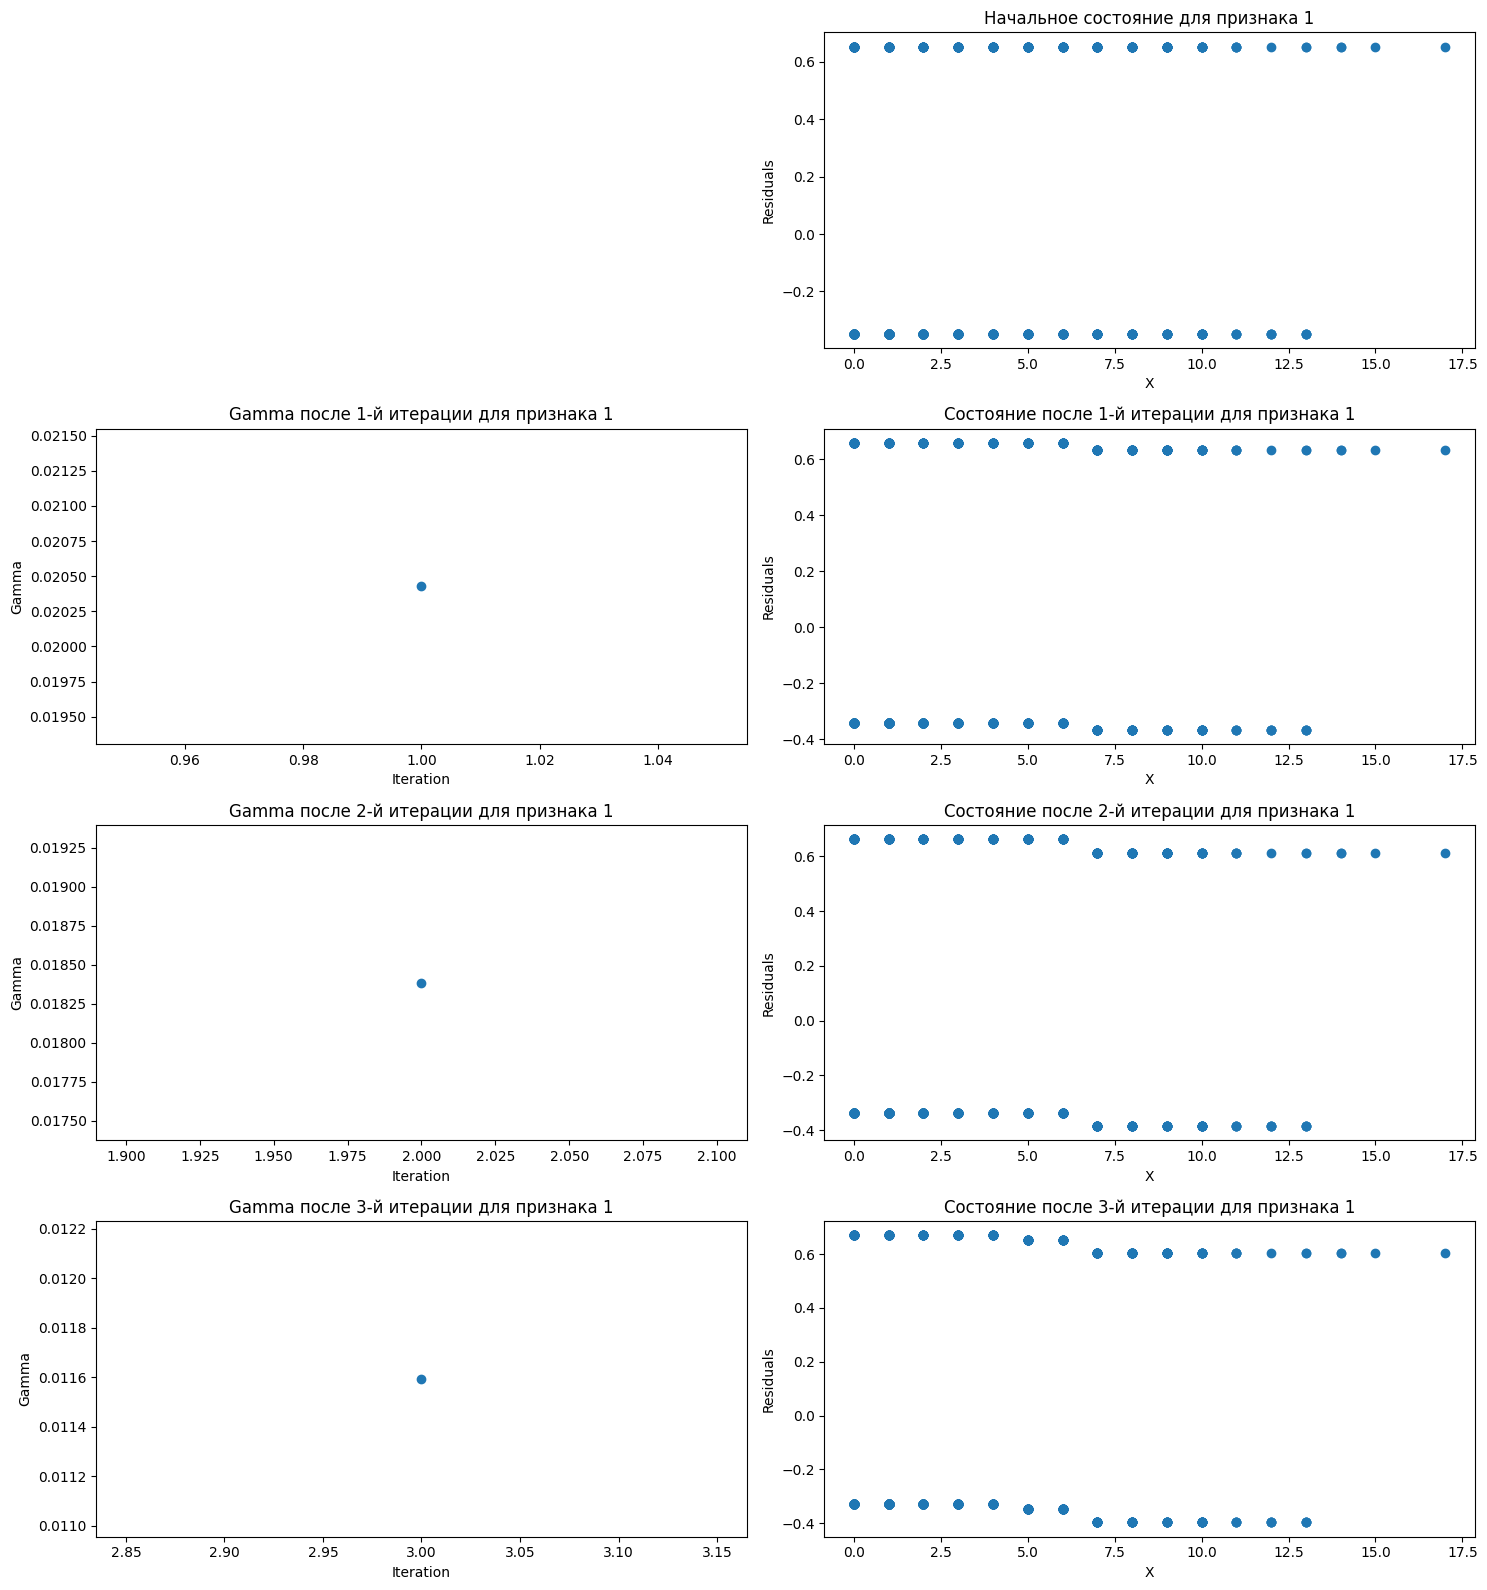

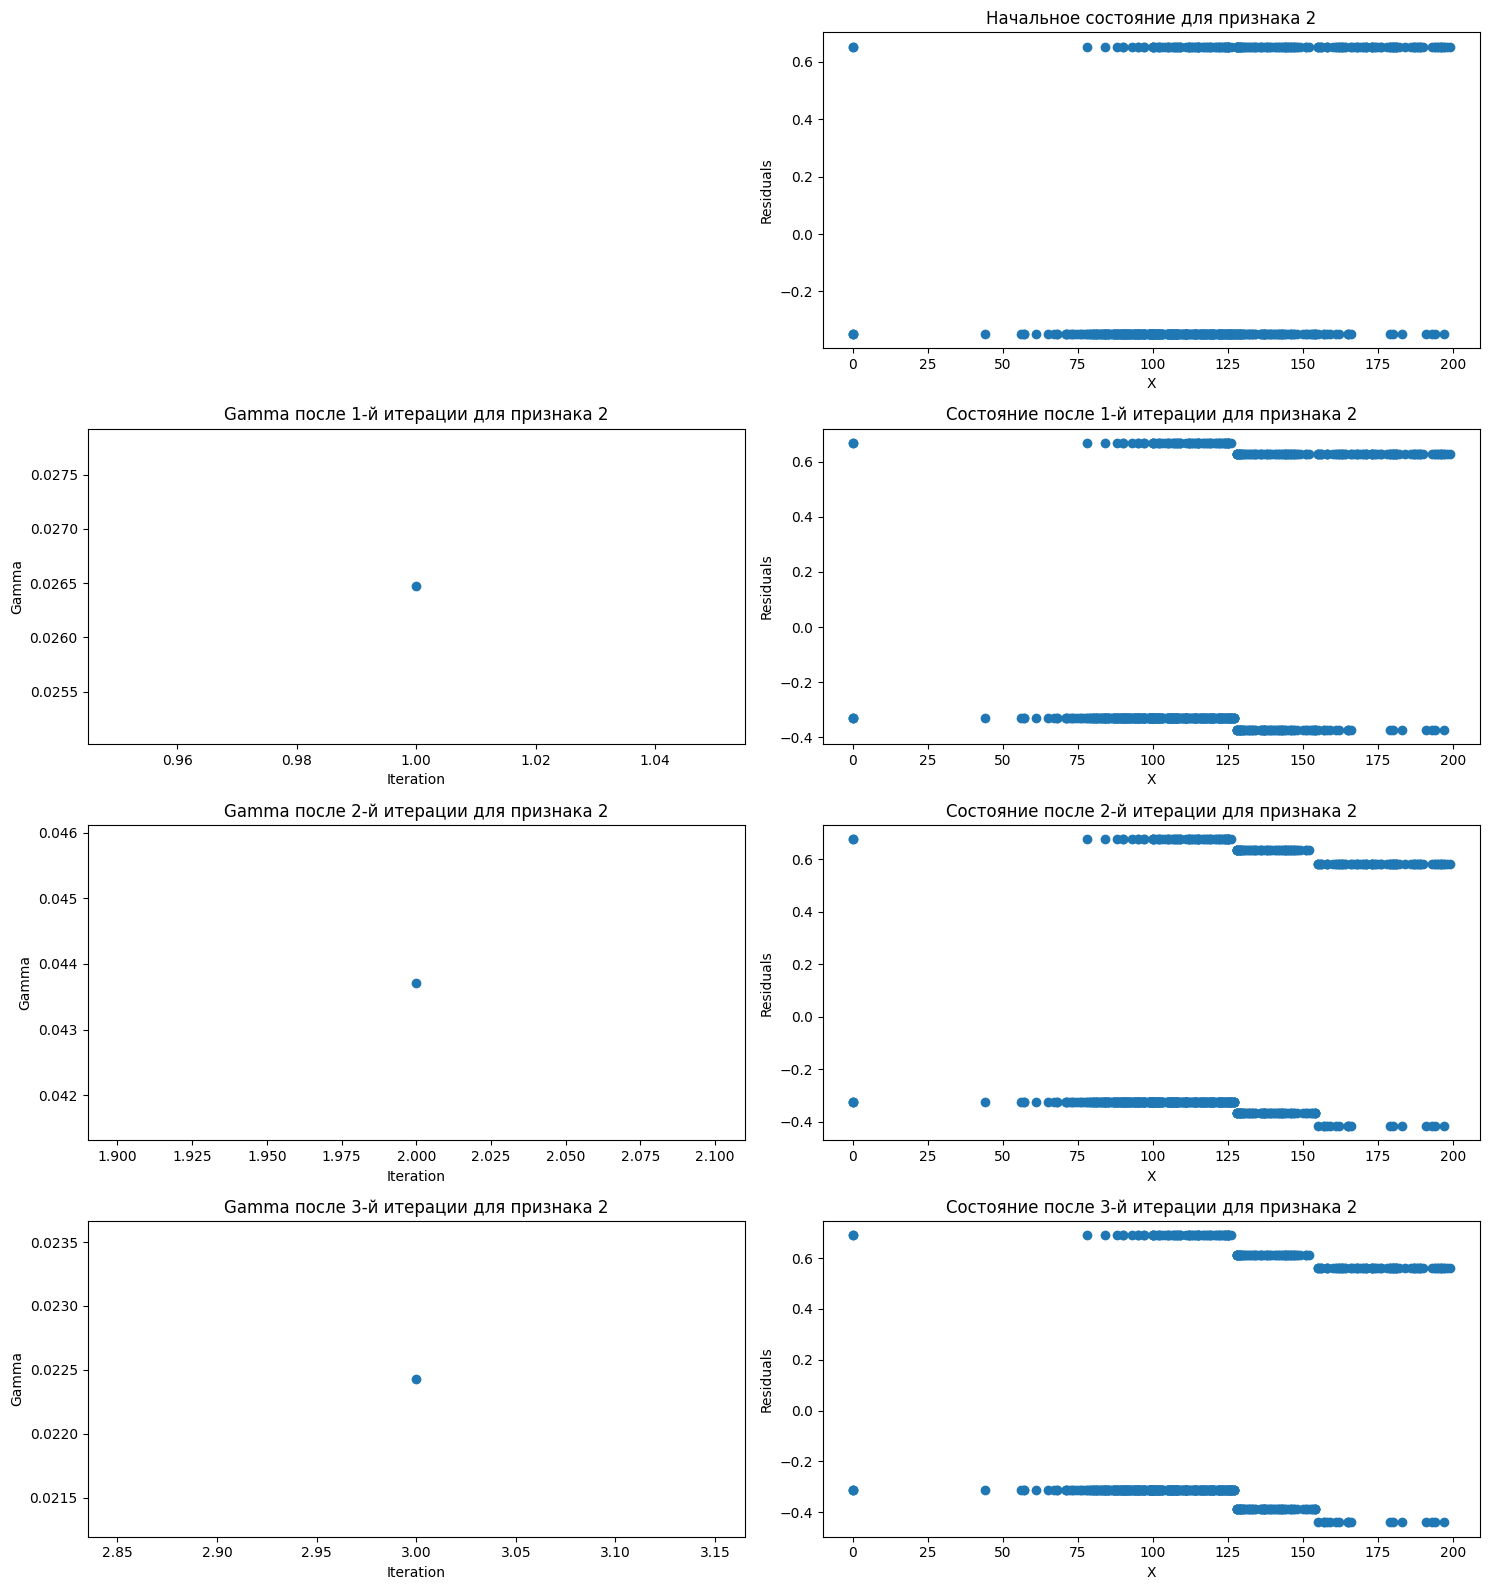

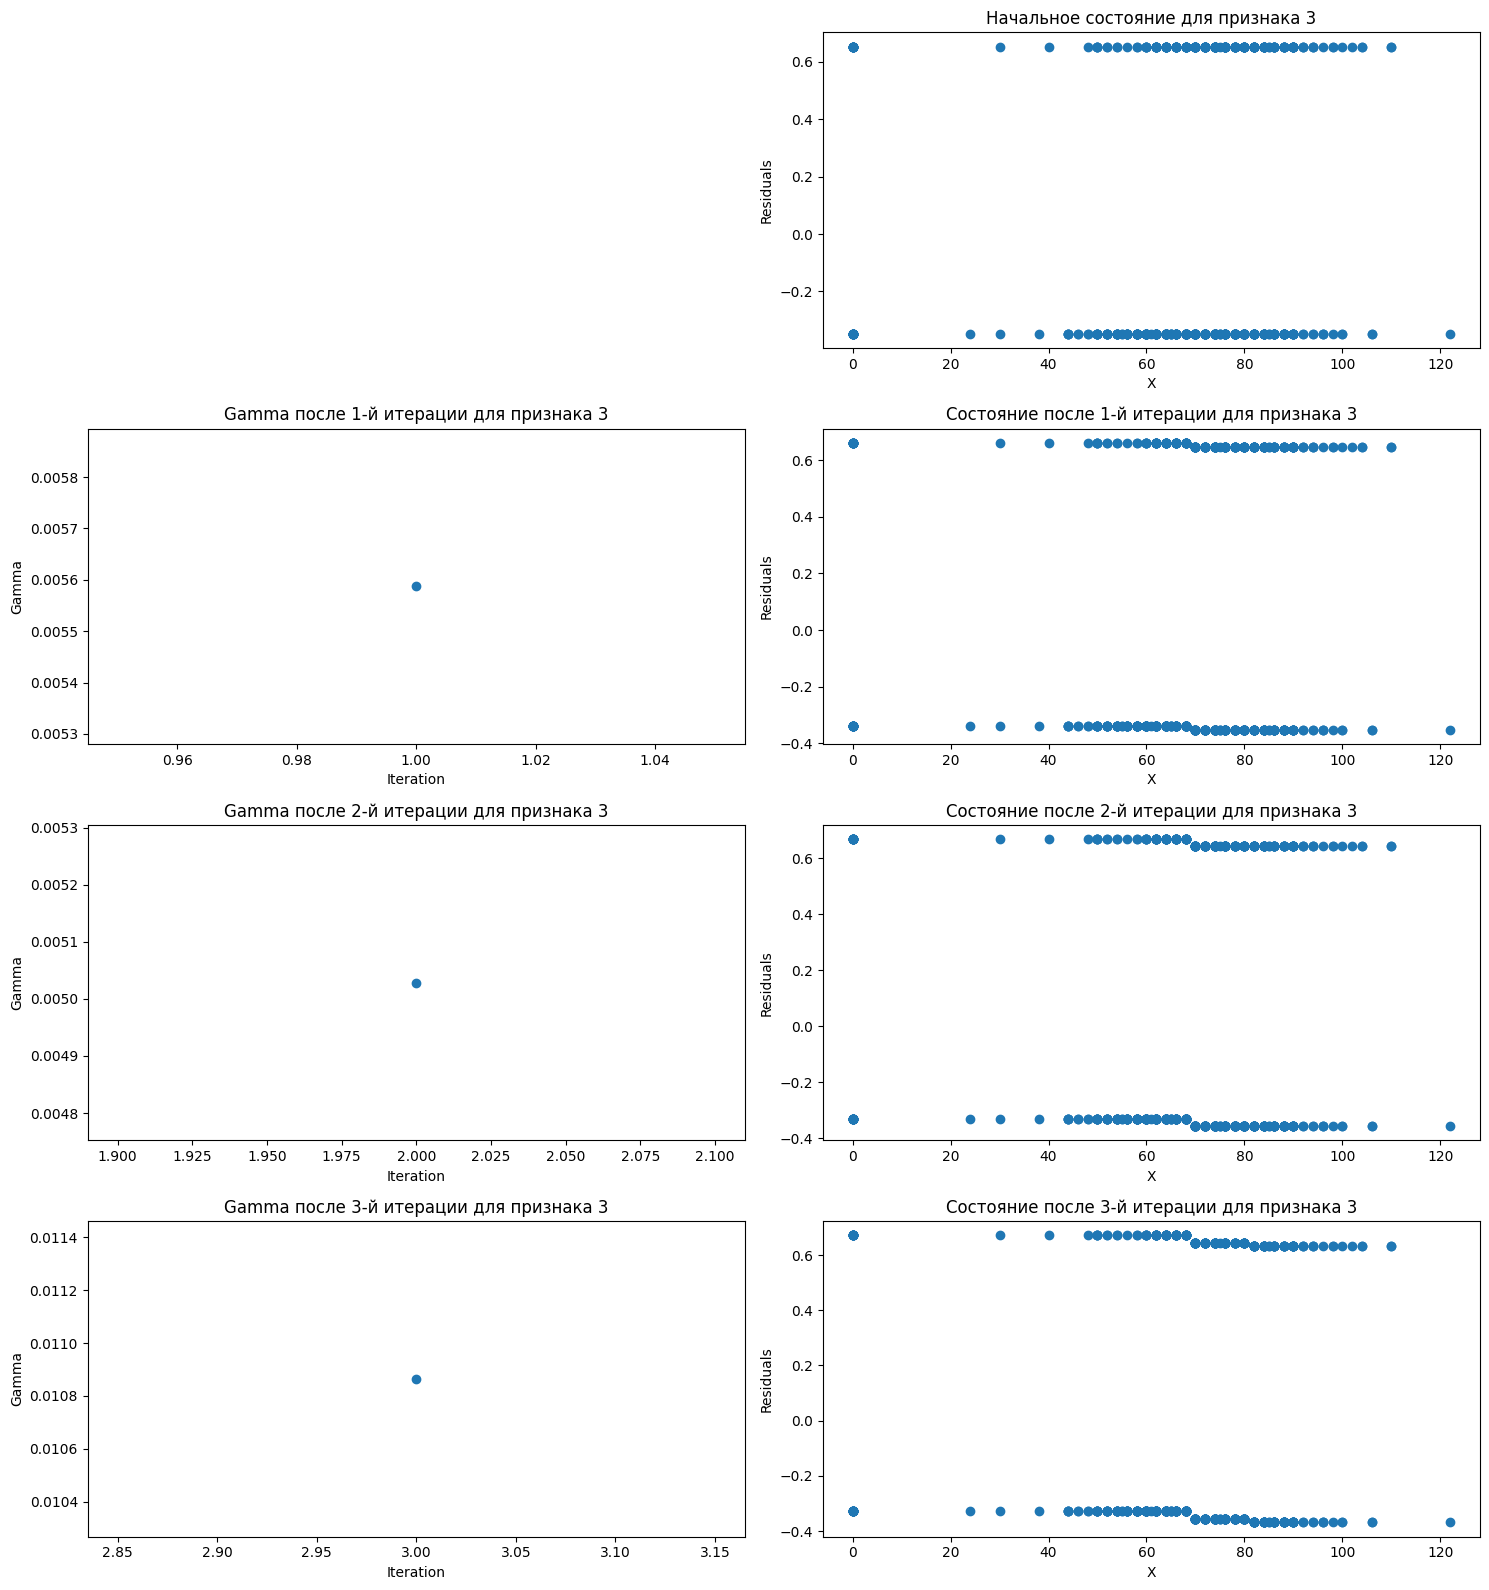

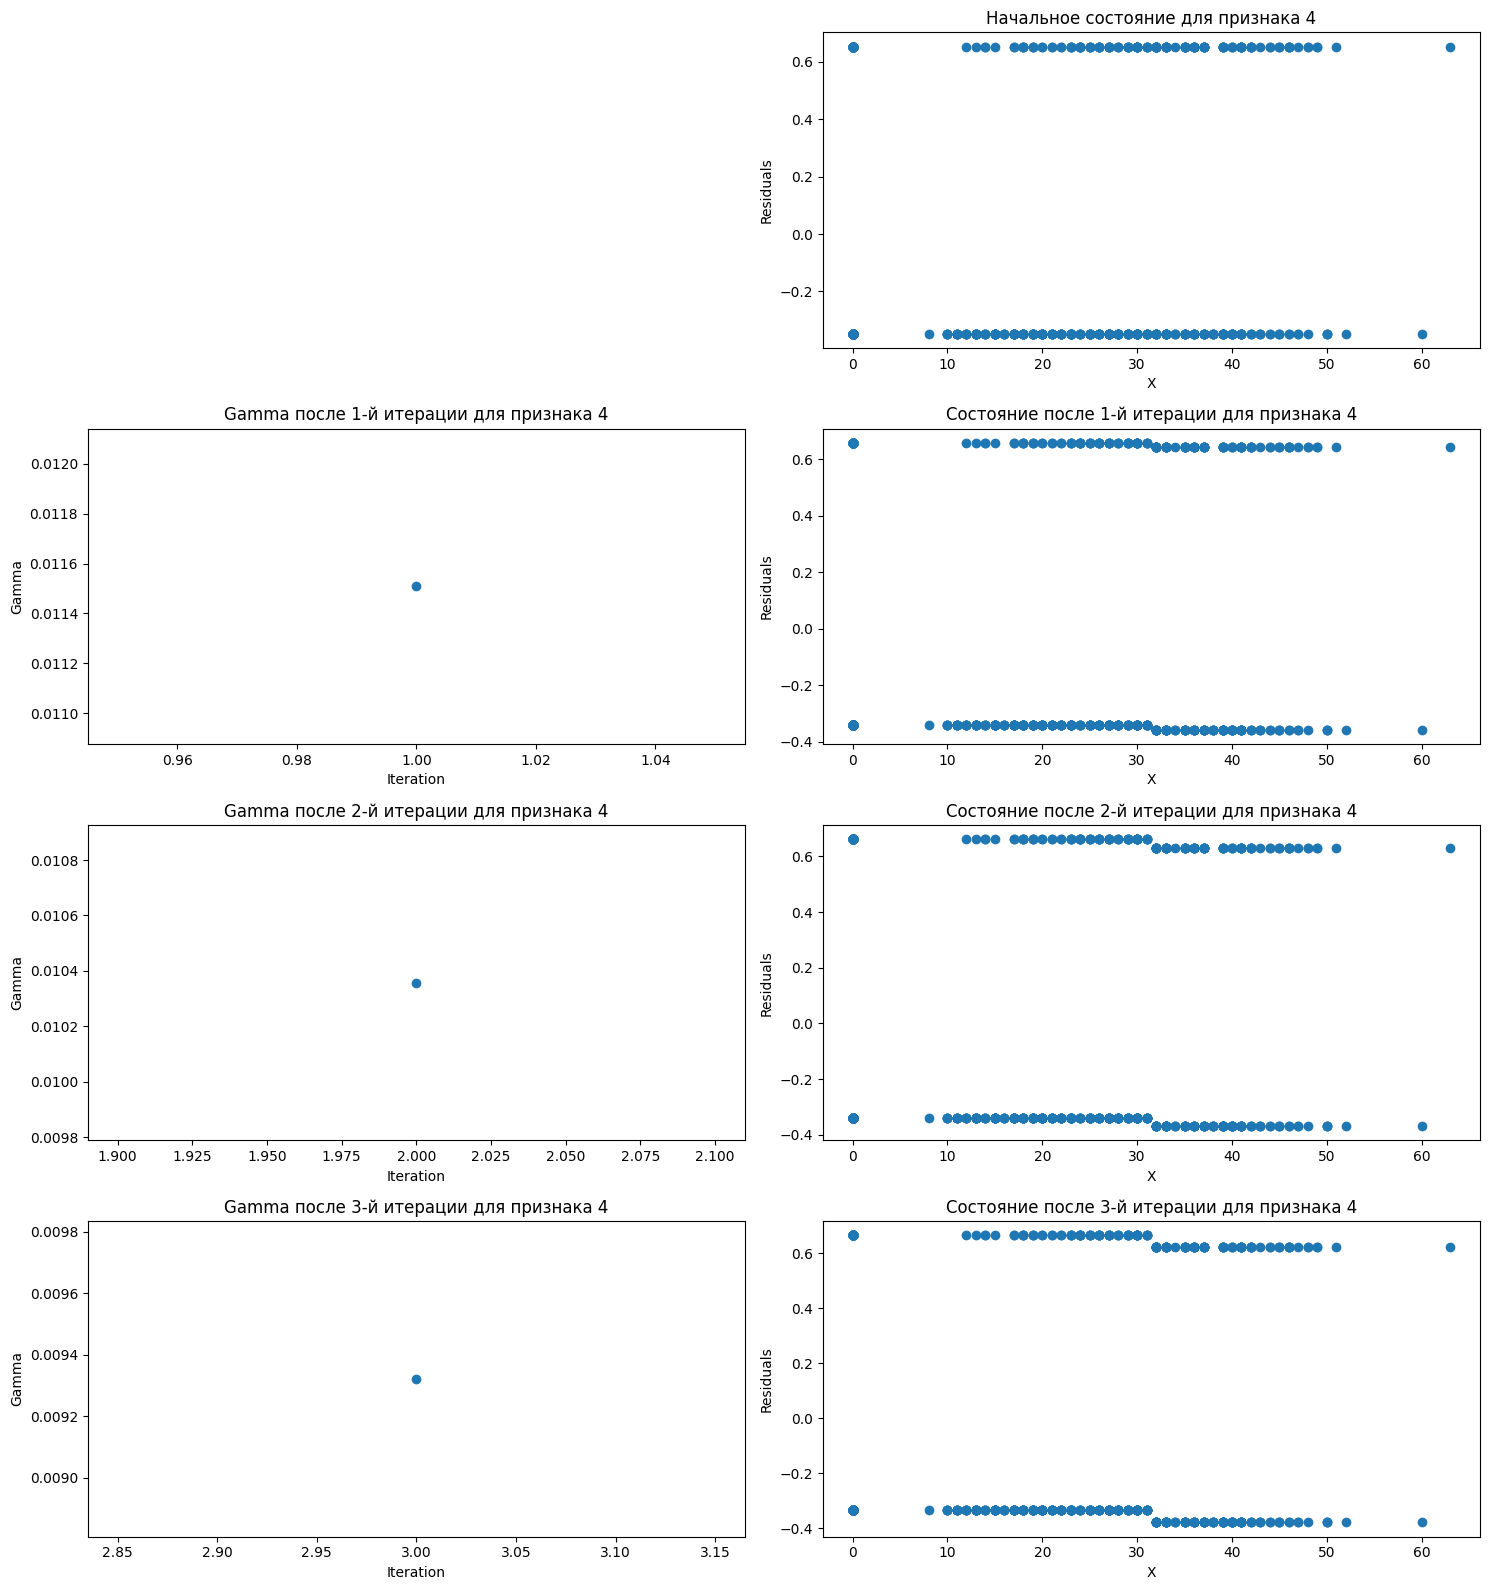

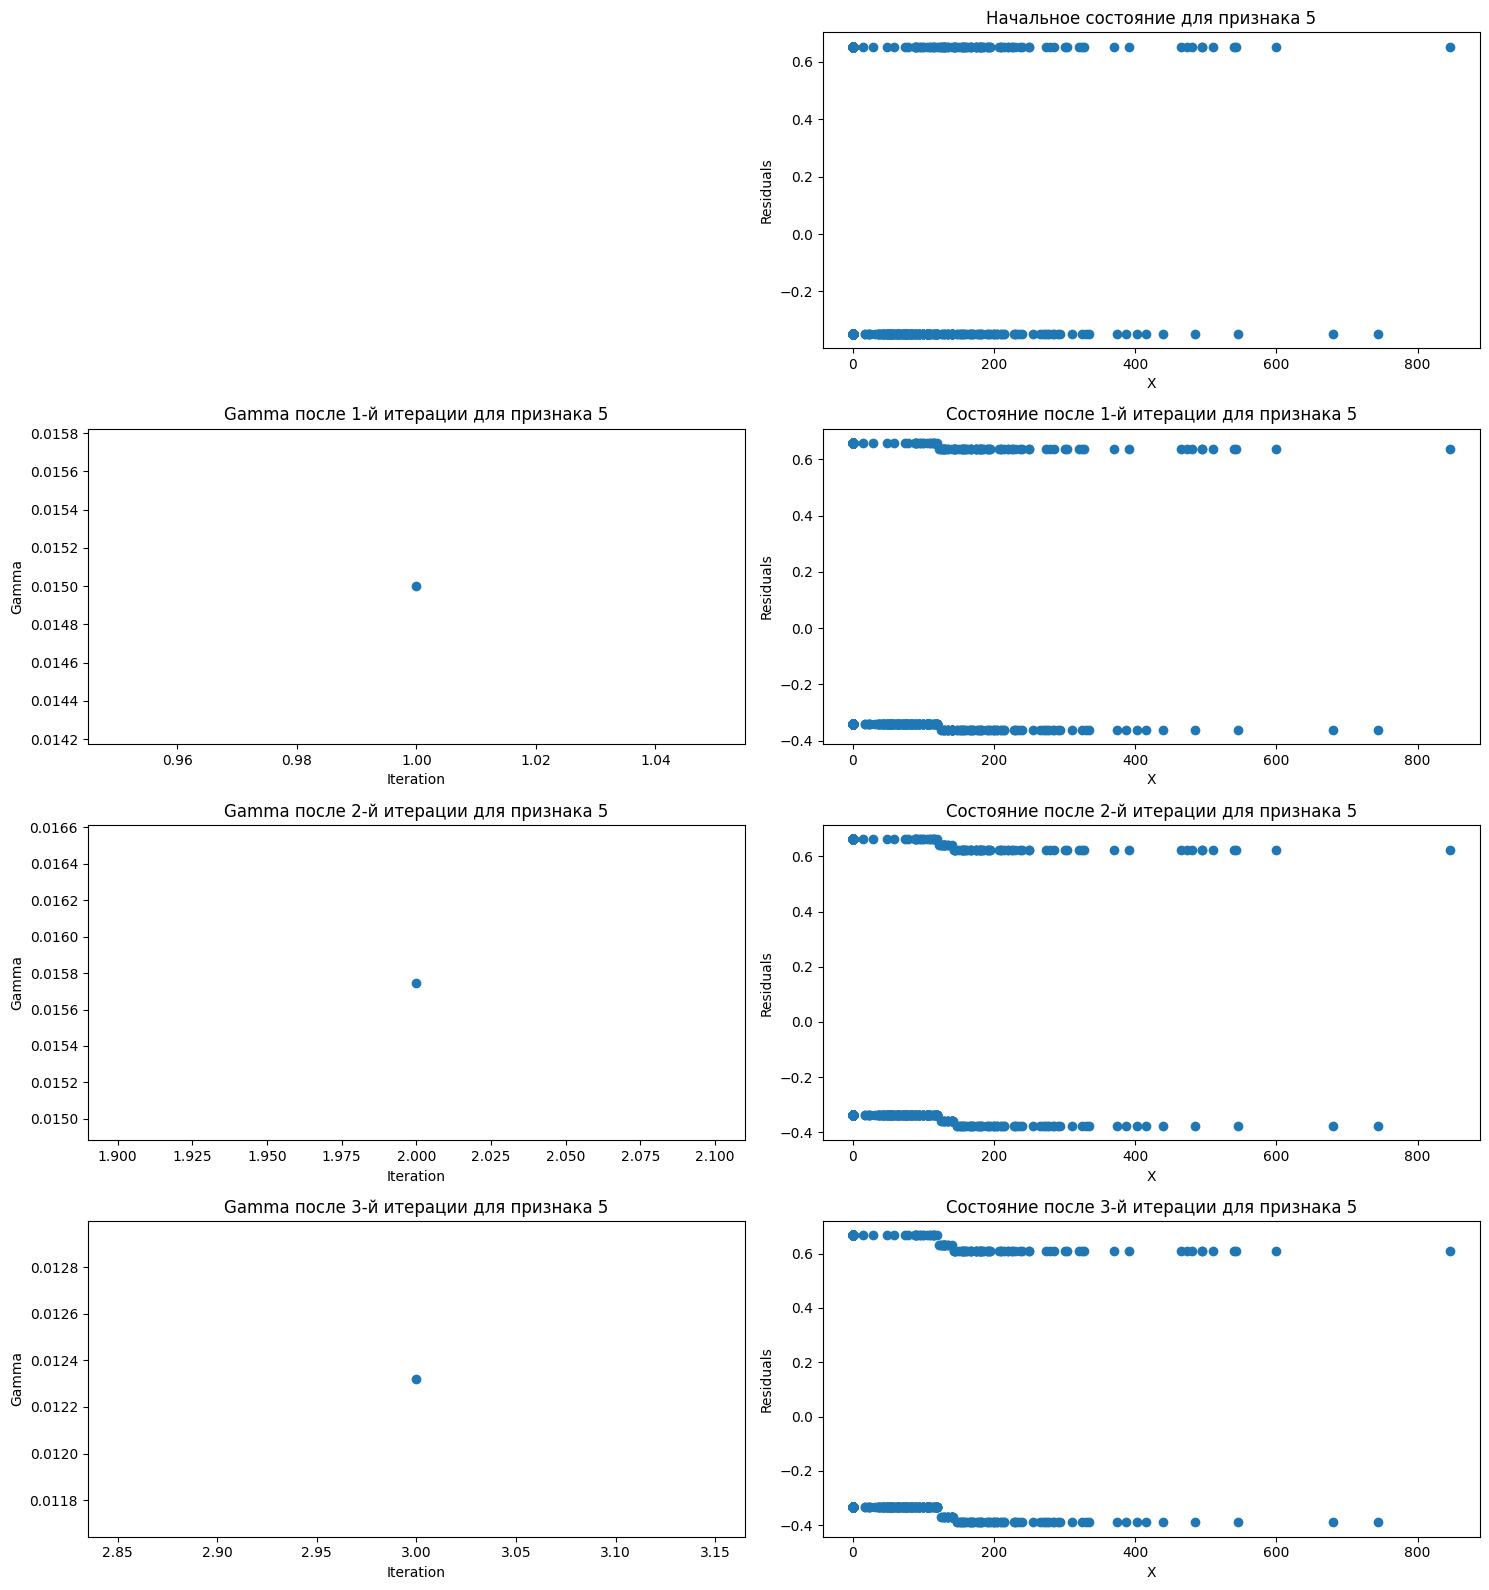

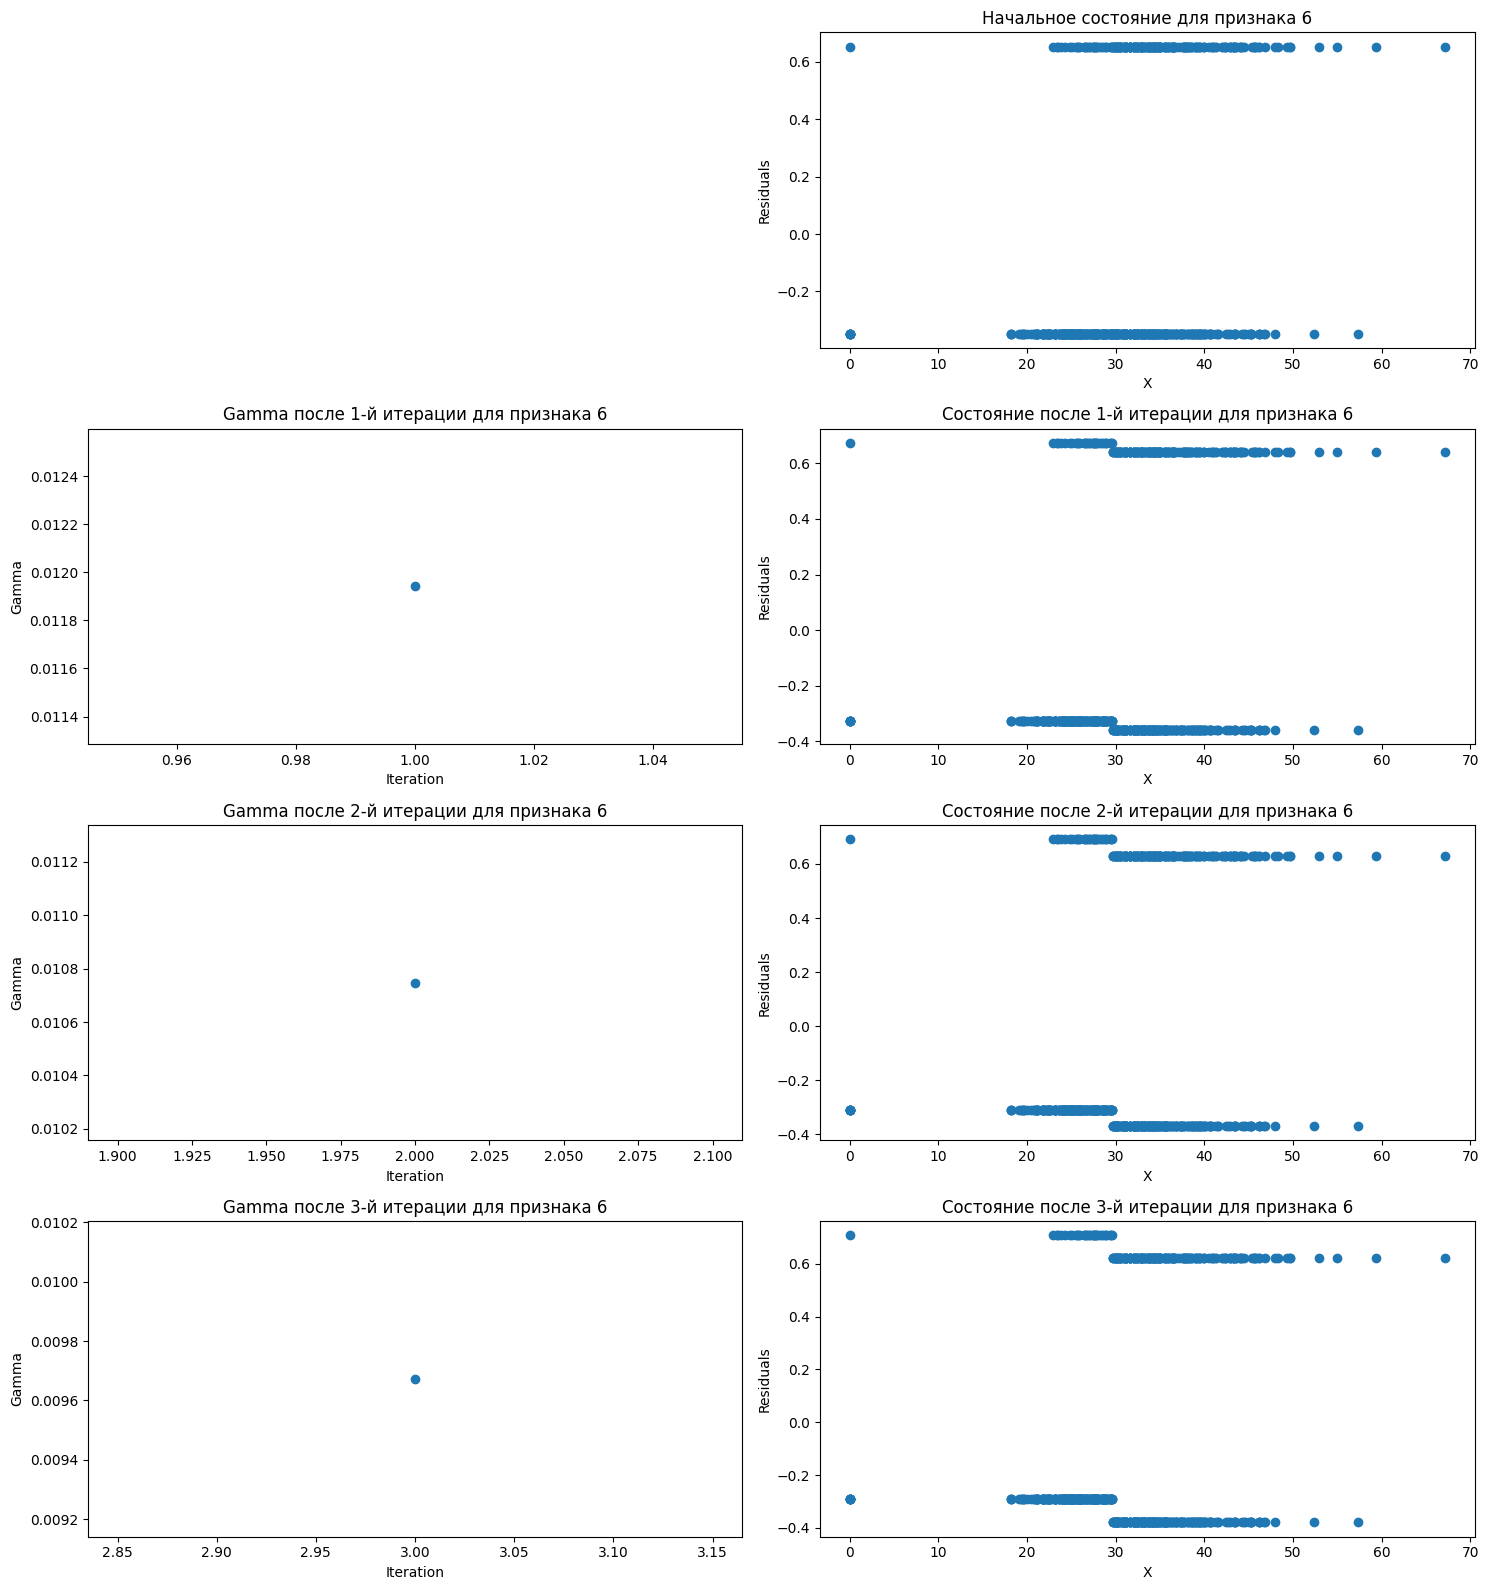

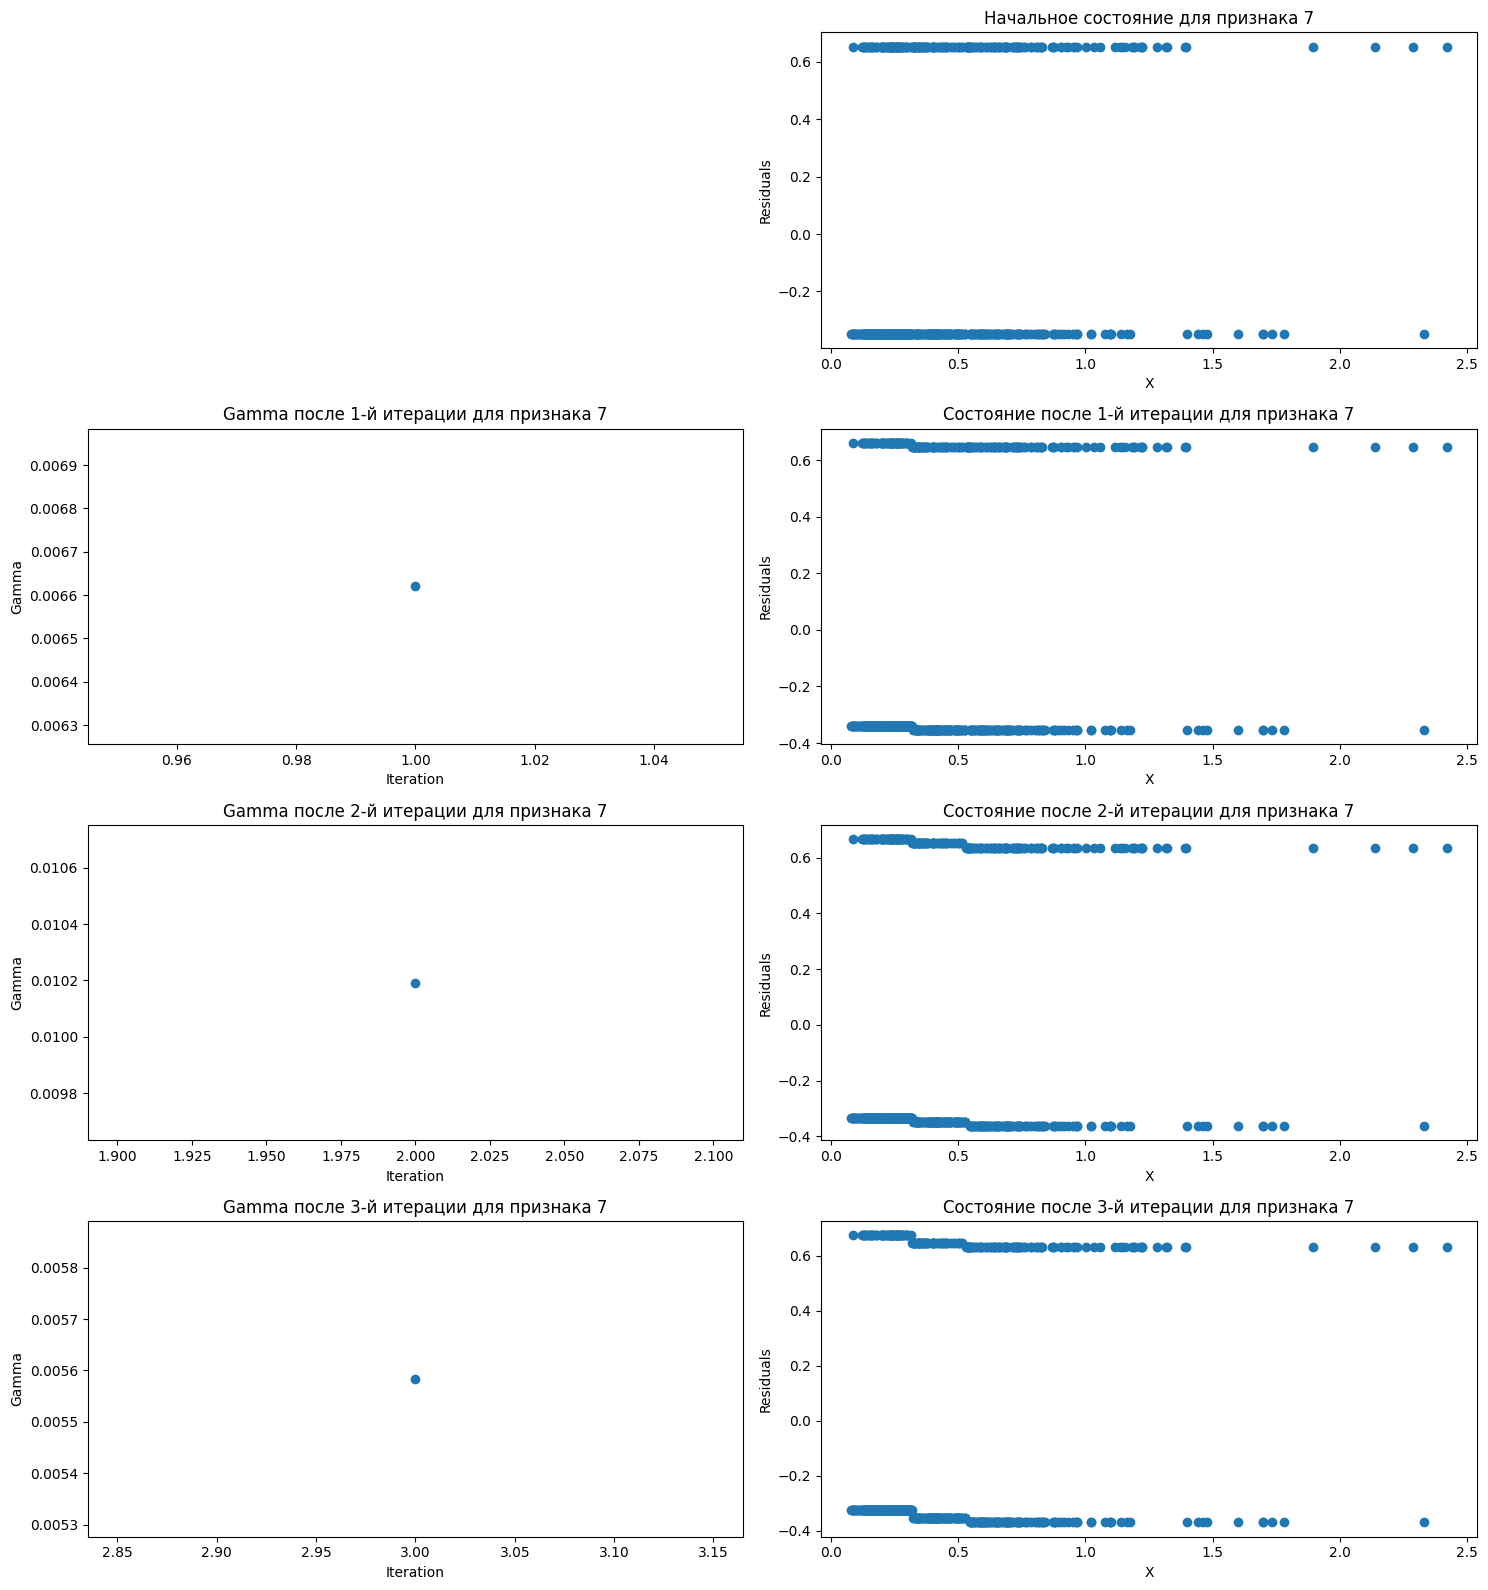

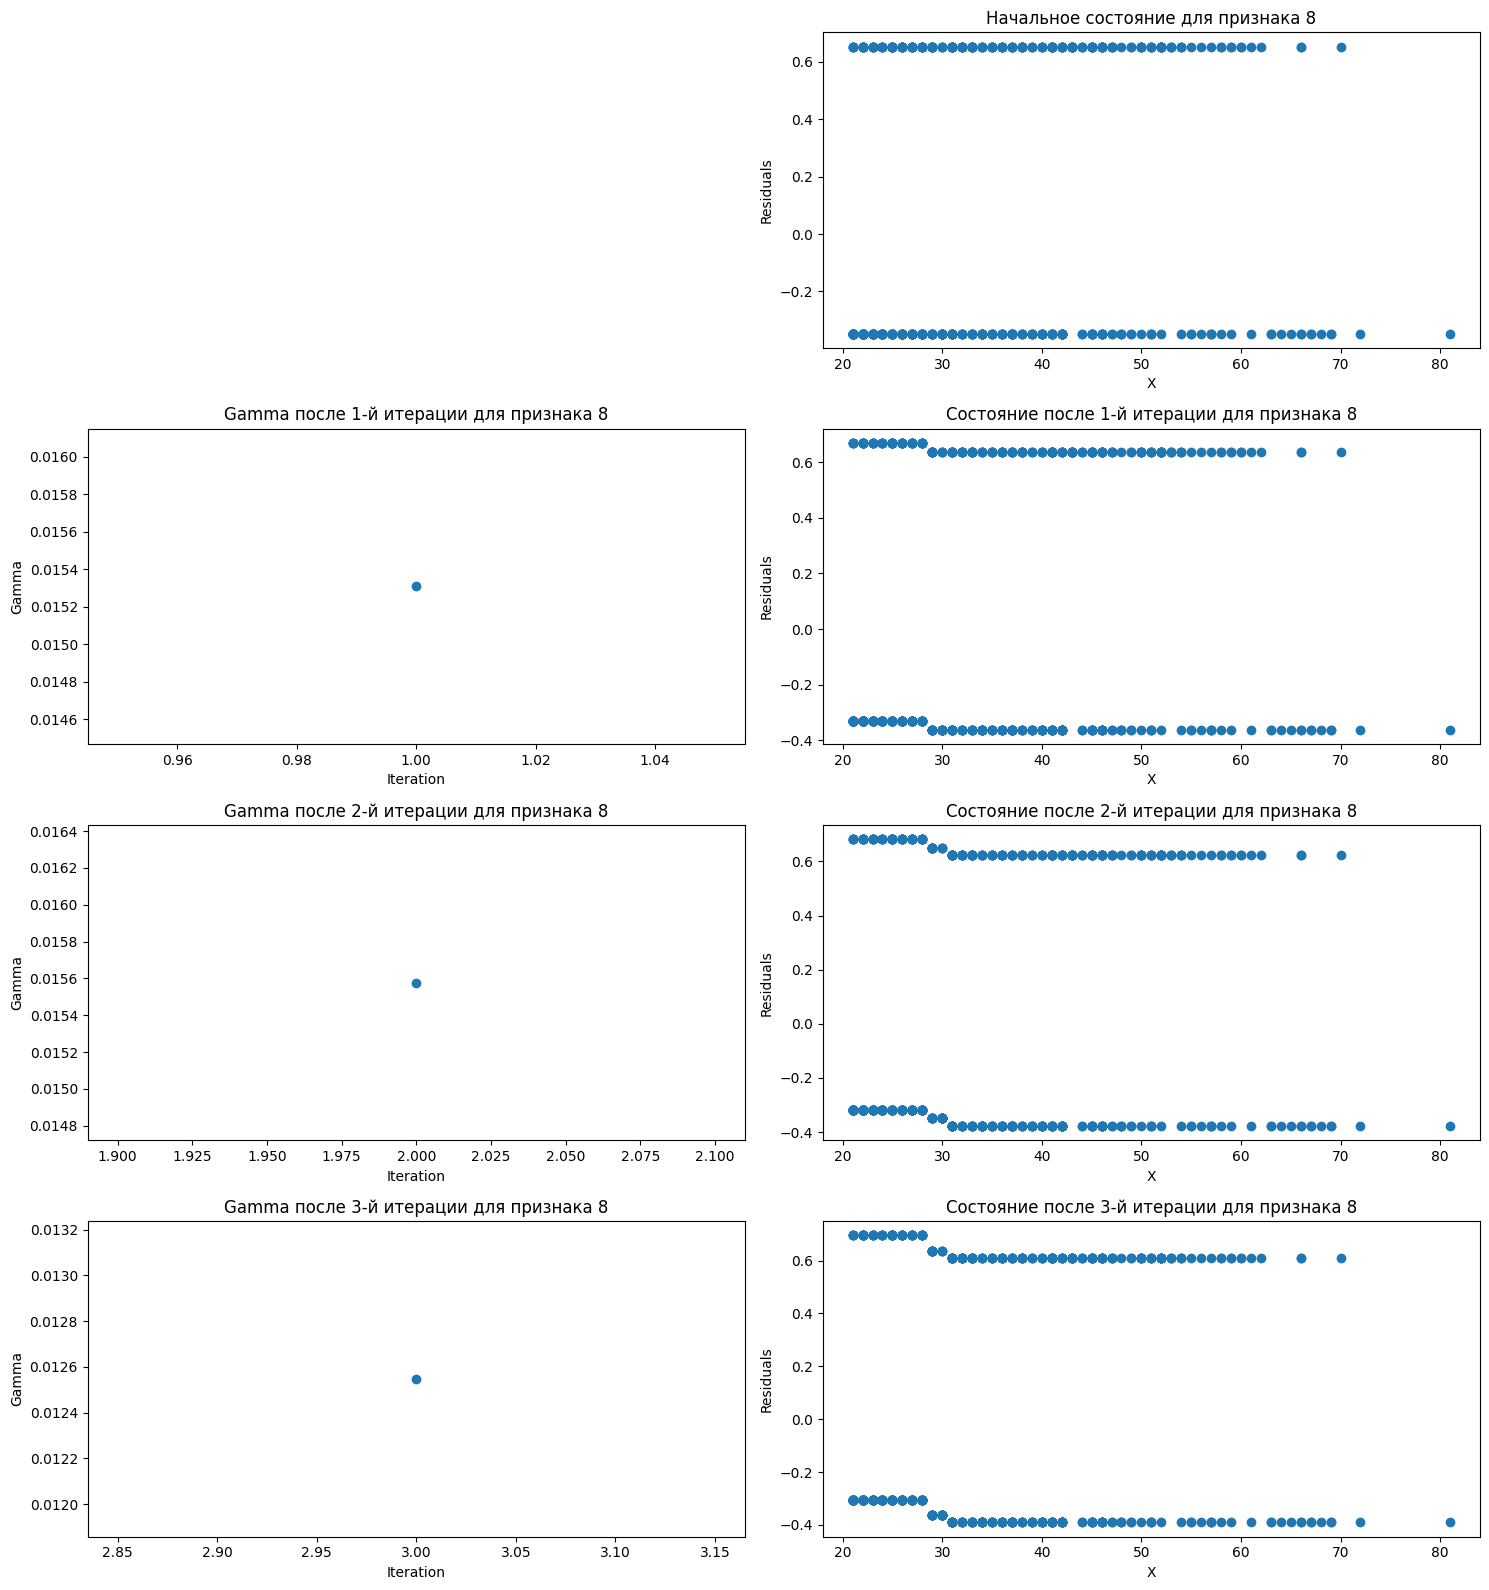

In [50]:
# Загрузка и предобработка данных
df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели и оценка точности
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}')

# Построение графиков остатков и значений gamma для каждого признака и каждой итерации
for i in range(X_train.shape[1]):
    x = X_train[:, i].reshape(-1, 1)
    y = y_train
    Fm = np.full(len(y), y.mean())
    n_estimators = 3

    fig, axs = plt.subplots(n_estimators+1, 2, figsize=(15, 4*(n_estimators+1)))
    axs = axs.flatten()
    axs[0].axis('off')
    plot_residuals(x, y, Fm, 0, axs[1], title=f"Начальное состояние для признака {i+1}")

    for j in range(n_estimators):
        tree, Fm, gamma, residuals = train_and_update(x, y, Fm, learning_rate=0.1)
        plot_gamma(j+1, gamma, axs[j*2+2], title=f"Gamma после {j+1}-й итерации для признака {i+1}")
        plot_residuals(x, y, Fm, j+1, axs[j*2+3], title=f"Состояние после {j+1}-й итерации для признака {i+1}")

    plt.tight_layout()
    plt.show()

## 2. Используем метод Random Forest для тех же самых данных и с тойже самой меткой (учителем).

Точность:  0.7207792207792207


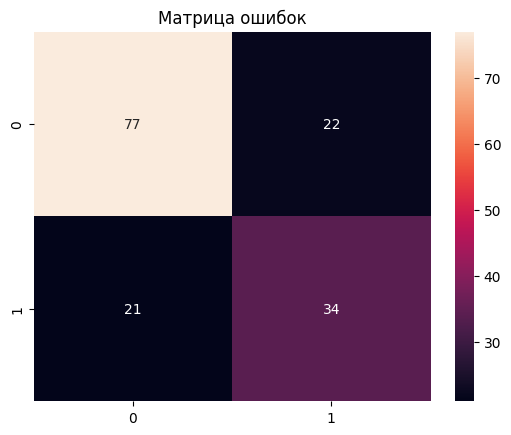

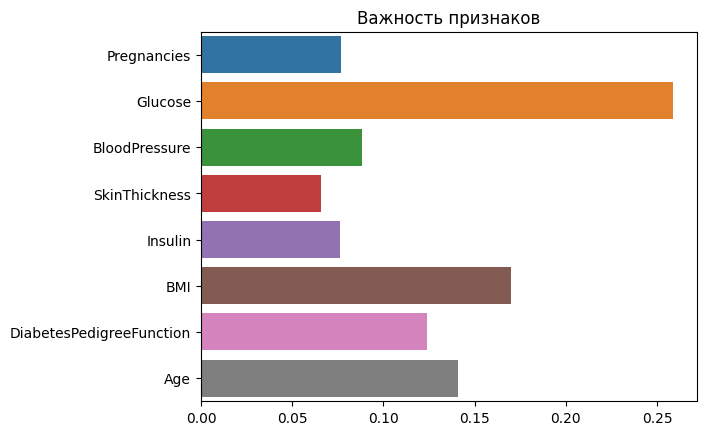

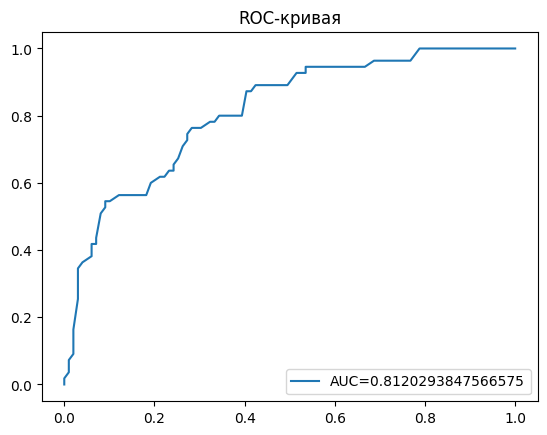

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('diabetes.csv')

# Разделение данных на признаки и целевую переменную
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели случайного леса
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Предсказание значений для тестовой выборки
y_pred = rf_clf.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print('Точность: ', accuracy)

# Визуализация матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Матрица ошибок')
plt.show()

# Визуализация важности признаков
feature_importance = rf_clf.feature_importances_
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Важность признаков')
plt.show()

# Визуализация ROC-кривой
y_pred_proba = rf_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = auc(fpr,tpr)

plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.legend(loc=4)
plt.title('ROC-кривая')
plt.show()

## Сравним значения метрики качества (accuracy) между двумя этими методами 

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Загрузка и предобработка данных
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели Gradient Boosting и вычисление метрик
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

# Обучение модели Random Forest и вычисление метрик
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# Вывод результатов
print("Метрики для модели Gradient Boosting: ")
print(f"Точность (accuracy): {gb_accuracy}")
print(f"Точность (precision): {gb_precision}")
print(f"Полнота (recall): {gb_recall}")
print(f"F1-оценка: {gb_f1}")
print("\n")
print("Метрики для модели Random Forest: ")
print(f"Точность (accuracy): {rf_accuracy}")
print(f"Точность (precision): {rf_precision}")
print(f"Полнота (recall): {rf_recall}")
print(f"F1-оценка: {rf_f1}")

Метрики для модели Gradient Boosting: 
Точность (accuracy): 0.7467532467532467
Точность (precision): 0.6379310344827587
Полнота (recall): 0.6727272727272727
F1-оценка: 0.6548672566371682


Метрики для модели Random Forest: 
Точность (accuracy): 0.7207792207792207
Точность (precision): 0.6071428571428571
Полнота (recall): 0.6181818181818182
F1-оценка: 0.6126126126126126
